<a href="https://colab.research.google.com/github/o-bollverk/msf/blob/main/msf_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the repository

In [1]:
# Clone the entire repo.
!git clone -l -s git://github.com/o-bollverk/msf cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 6868, done.
remote: Total 6868 (delta 0), reused 0 (delta 0), pack-reused 6868
Receiving objects: 100% (6868/6868), 987.40 MiB | 38.34 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Checking out files: 100% (6823/6823), done.
/content/cloned-repo
colab  msf_data  web_data


In [23]:
! git pull

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 9 (delta 6), reused 9 (delta 6), pack-reused 0
Unpacking objects: 100% (9/9), done.
From git://github.com/o-bollverk/msf
   b4652cd..e59a333  main       -> origin/main
Updating b4652cd..e59a333
Fast-forward
 web_data/airbus_google      | 517 +++++++++++++++++++++++++++++++++++++
 web_data/cubcraft_google    | 604 ++++++++++++++++++++++++++++++++++++++++++++
 web_data/daher_google       | 488 +++++++++++++++++++++++++++++++++++
 web_data/diamond40ng_google | 551 ++++++++++++++++++++++++++++++++++++++++
 web_data/diamondda62_google | 524 ++++++++++++++++++++++++++++++++++++++
 web_data/extra_google       | 583 ++++++++++++++++++++++++++++++++++++++++++
 6 files changed, 3267 insertions(+)
 create mode 100644 web_data/airbus_google
 create mode 100644 web_data/cubcraft_google
 create mode 100644 web_data/daher_google
 create mode 100644 web_data/di

In [6]:
from fastai.vision import *
from fastai.metrics import error_rate

path = untar_data(URLs.CIFAR); path #it says just CIFAR, but since there is CIFAR_100, I hope that this is CIFAR10
data = ImageDataBunch.from_folder(path, valid_pct = 0.1, size=48)
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.144784,1.013329,0.642667,01:04
1,0.826508,0.742142,0.741000,01:02
2,0.732081,0.687600,0.763167,01:02


## fast.ai on MNIST

In [ ]:
path = untar_data(URLs.MNIST); path
data = ImageDataBunch.from_folder(path, valid_pct=.1, size=48)
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.261512,0.167457,0.948000,01:11
1,0.115394,0.080586,0.974857,01:10
2,0.080899,0.065679,0.979429,01:11


## Creating your own dataset using fast.ai
*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

### Get a list of URLs

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>j</kbd> on Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> on macOS, and a small window the javascript 'Console' will appear. In Firefox press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>k</kbd> on Windows/Linux or <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd> on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

## Download images
Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

In [22]:
ls web_data/

aviat_google  boeing_google


In [24]:
for new_name in ["airbus", "aviat", "boeing", "cubcraft", "daher", "diamond40ng", "diamondda62", "extra"]:
  folder = new_name
  file = new_name + '.csv'
  path = Path('data/cats')
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)
  download_images('web_data/' + new_name + '_google', dest, max_pics=400)

## View data

In [25]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [26]:
data.classes

['airbus',
 'aviat',
 'boeing',
 'cubcraft',
 'daher',
 'diamond40ng',
 'diamondda62',
 'extra']

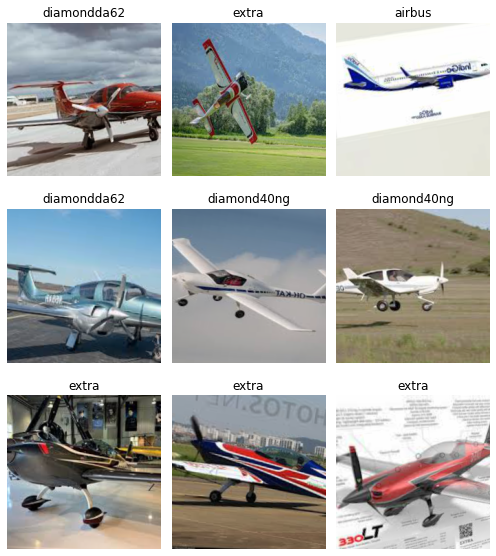

In [27]:
data.show_batch(rows=3, figsize=(7,8))

In [28]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['airbus',
  'aviat',
  'boeing',
  'cubcraft',
  'daher',
  'diamond40ng',
  'diamondda62',
  'extra'],
 8,
 2538,
 634)

## Train model

In [29]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [30]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,2.090692,1.238290,0.641956,14:25
1,1.554031,1.129694,0.657729,14:29


In [31]:
interp = ClassificationInterpretation.from_learner(learn)

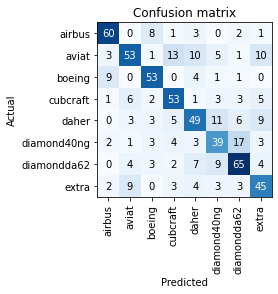

In [32]:
interp.plot_confusion_matrix()

In [48]:
# Selecting one picture for visualization  (requires authorisation)
from google.colab import drive
from urllib.request import urlopen
from PIL import Image
import cv2
import numpy as np

drive.mount('/content/drive')
path = "data/cats/airbus/00000001.jpg"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
path

'data/cats/airbus/00000001.jpg'

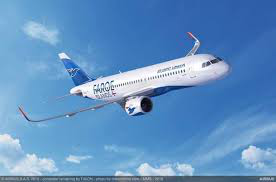

In [50]:
img = open_image(path)
img


In [51]:
import numpy as np
pred_class,pred_idx,outputs = learn.predict(img)
data.classes[int(pred_class)]

'airbus'

In [104]:
from os import listdir
import warnings

selection_size = 100
clear_images = listdir("msf_data/image_data_clear/")
warnings.filterwarnings('ignore')

tulemused = []
random_selection = np.random.random_integers(0, len(clear_images) -1, size = selection_size)
for i in random_selection:
  path =  "msf_data/image_data_clear/" + str(clear_images[i])
  img = open_image(path)
  pred_class,pred_idx,outputs = learn.predict(img)
  vastus = data.classes[int(pred_class)]
  tulemused = np.append(tulemused, vastus)
correct_labels = np.array([x.split("_clear")[0] for x in clear_images])[random_selection]
accuracy = sum(tulemused == correct_labels)/len(correct_labels)
print(accuracy)


0.38


In [105]:
pd.DataFrame({"correct": correct_labels, "prediction": tulemused}).sort_values("correct")

,correct,prediction
74,airbus,diamond40ng
34,airbus,diamond40ng
50,airbus,daher
19,airbus,boeing
17,airbus,daher
...,...,...
42,extra,extra
5,extra,cubcraft
6,extra,extra
48,extra,extra
